In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [3]:
df = pd.read_csv("C:/Users/micha/Downloads/archive (2)/fraud_financial_project.csv")


In [205]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


isfraud: 1(fraudlent transaction),0(non fraudlent transaction)

In [4]:
df["isFraud"].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

The feature isFlaggedFraus does not contain fraudlent transaction. Which is interesting i'm unsure on why this is the case but it seems that these transactions do not get detected as fraud 

In [5]:
df["isFlaggedFraud"].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [206]:
df.loc[df["isFraud"] == 1].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [12]:
df["type"].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

We see that whenever a transaction is fraudlent it always of type transfer/cashout
which makes sense fraudlent agents will only be interested in transferring the money and cashing out to profit

In [11]:
df.loc[df["isFraud"] == 1]["type"].value_counts()

CASH_OUT    578
TRANSFER    564
Name: type, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E00DF6780>,
      dtype=object)

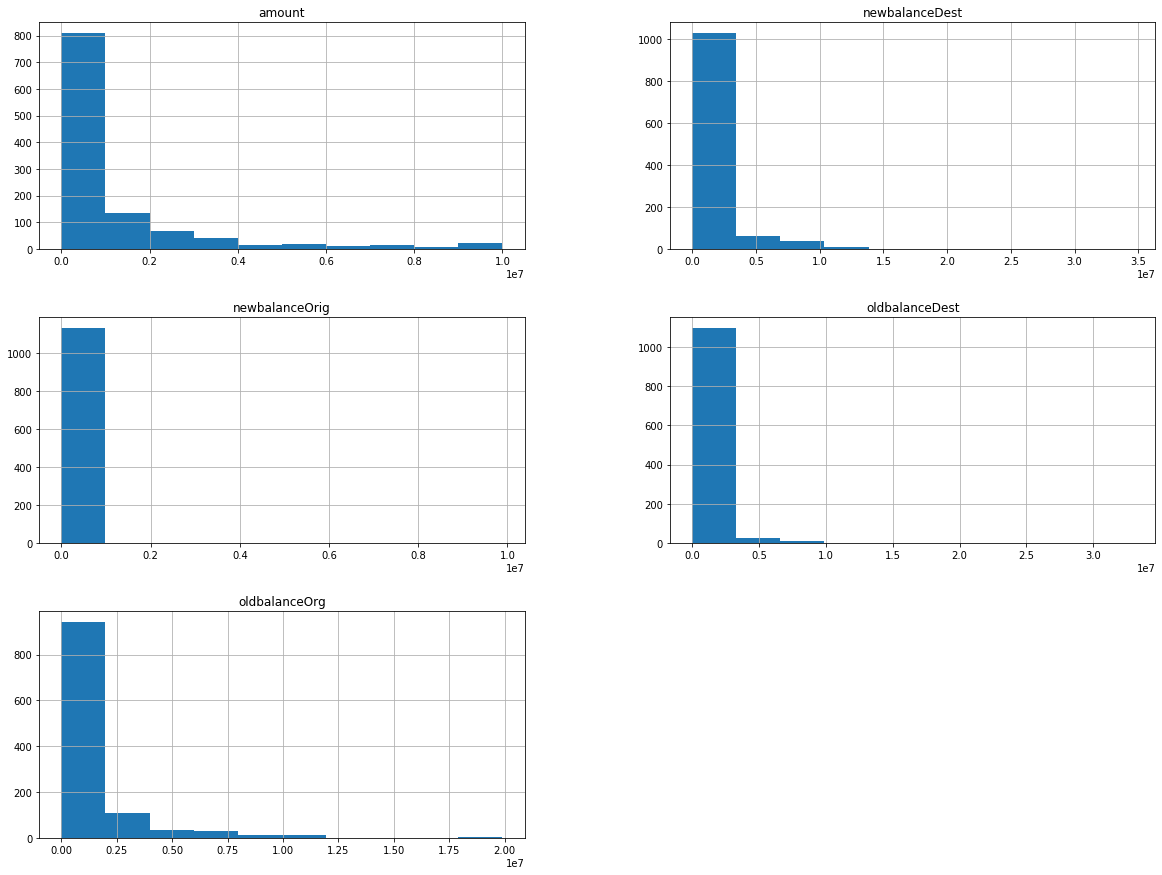

In [17]:
df.loc[df["isFraud"] == 1][["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].hist(figsize=(20,15))

Name of Customers who started transaction and the recepient. I want to see if there is any trend between the two

In [22]:
df.loc[df["isFraud"] == 1][["nameOrig","nameDest"]]

,nameOrig,nameDest
step,,
1,C1305486145,C553264065
1,C840083671,C38997010
1,C1420196421,C972765878
1,C2101527076,C1007251739
1,C137533655,C1848415041
...,...,...
95,C526144262,C79051264
95,C732111322,C1140210295
95,C1000086512,C1759363094


In [26]:
df.loc[df["isFraud"] == 1]["nameDest"].duplicated().sum()

10

In [28]:
df.loc[df["isFraud"] == 1]["nameOrig"].duplicated().sum()

0

In [23]:
df.loc[df["isFraud"] == 1][["nameOrig","nameDest"]].duplicated().sum()

0

So where there are frauds there are duplicates values for these recepients within the dataset.
So these receipents are recieving transactions from different customers making the transactions

In [56]:
Fraudlent_transactions = df.loc[df["isFraud"] == 1]

In [63]:
Fraudlent_transactions

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...
95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1,0
95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1,0
95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1,0


In [62]:
Fraudlent_transactions.duplicated().sum()

0

Feature engineering
I want to create new features between the balances to see if we can spot a trend.
Also we will have multicollinearity between our features(oldbalanceOrg,newbalanceOrg)
and(oldbalanceDest,newbalanceDest).

In [20]:
df["balancechangeOrg"] = df["oldbalanceOrg"] - df["newbalanceOrig"]

In [21]:
df["balancechangeDest"] = df["oldbalanceDest"] - df["newbalanceDest"]

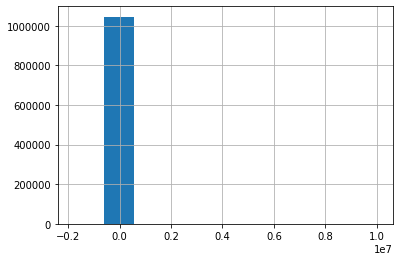

In [22]:
df["balancechangeOrg"].hist()

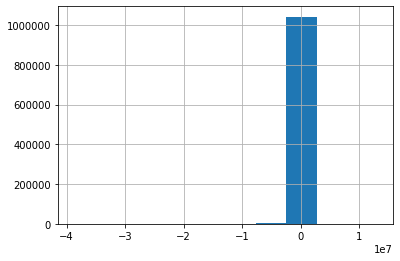

In [23]:
df["balancechangeDest"].hist()

In [24]:
df[["balancechangeOrg","balancechangeDest"]]

,balancechangeOrg,balancechangeDest
step,,
1,9839.64,0.00
1,1864.28,0.00
1,181.00,0.00
1,181.00,21182.00
1,11668.14,0.00
...,...,...
95,132557.35,-132557.35
95,9917.36,0.00
95,14140.05,0.00


steps represent time. Each step means 1 hour of time.

In [8]:
df["type"].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [4]:
df["type"] = df["type"].map({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5})

In [5]:
df["nameOrig"] = df["nameOrig"].apply(lambda x:int(x.strip("C")))

In [6]:
df["nameDest"] = df["nameDest"].apply(lambda x:int(x.strip("C").strip("M")))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 1 to 95
Data columns (total 12 columns):
type                 1048575 non-null int64
amount               1048575 non-null float64
nameOrig             1048575 non-null int64
oldbalanceOrg        1048575 non-null float64
newbalanceOrig       1048575 non-null float64
nameDest             1048575 non-null int64
oldbalanceDest       1048575 non-null float64
newbalanceDest       1048575 non-null float64
isFraud              1048575 non-null int64
isFlaggedFraud       1048575 non-null int64
balancechangeOrg     1048575 non-null float64
balancechangeDest    1048575 non-null float64
dtypes: float64(7), int64(5)
memory usage: 104.0 MB


X will be our independent features
y will be our dependent feature we are trying to predict

We would like to predict which features are fraudlent or not

In [7]:
y = df[["isFraud"]]
x = df[["step","type","amount","nameOrig","nameDest","newbalanceDest","oldbalanceDest","newbalanceOrig","oldbalanceOrg"]]

In [44]:
y

,isFraud
step,
1,0
1,0
1,1
1,1
1,0
...,...
95,0
95,0
95,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=25)

In [52]:
dummy = DummyClassifier(strategy="most_frequent")

In [53]:
dummy.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [54]:
pred_d = dummy.predict(X_test)
pred_d

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [215]:
dummy.score(X_test,y_test)

0.9988441467285156

In [216]:
np.unique(pred_d)

array([0], dtype=int64)

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score             # it correctly classified 261841 labels 
accuracy_score(y_test,pred_d,normalize=False)


261841

In [9]:
from sklearn.linear_model import LogisticRegression 
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier

We will use logisticRegression and Classifier models to classify fraudlent transactions

In [10]:
lgr = LogisticRegression()

In [220]:
lgr.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

We see that the model has overfitted. Which means there is high variance among our features. Are features are likely highly correlatted with each other. We will find significant features to keep in our model. It also possible because of imbalanced labels between fraudlent and non fraudlent tranaction. I will try to address this issue as well.

In [221]:
lgr.score(X_test,y_test)

0.9990272521972656

In [222]:
lpred= lgr.predict(X_test)

In [12]:
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

In [224]:
selector = RFE(lgr,n_features_to_select=5,step=1)

In [225]:
selector.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppDat

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [226]:
x.columns

Index(['step', 'type', 'amount', 'nameOrig', 'nameDest', 'newbalanceDest',
       'oldbalanceDest', 'newbalanceOrig', 'oldbalanceOrg'],
      dtype='object')

RFE is a feature selection methods that allows us to determine which feature is best for our model in this case the logistic Regression model.(1 being the best).
As we can see the features that are considered the best are 

-type
-amount
-oldbalance org
-nameblanceorig
-namebalanceDest

In [227]:
selector.ranking_

array([1, 2, 1, 5, 4, 3, 1, 1, 1])

In [228]:
selector.score(X_train,y_train)

0.9994913730511641

In [31]:
df["isFraud"].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

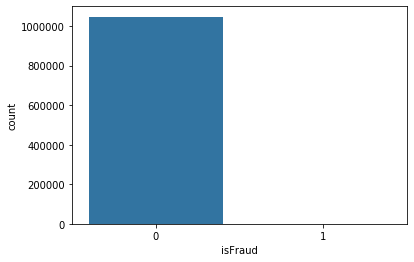

In [51]:
sns.countplot(df["isFraud"])

I believe because our labels is heavily inbalanced this results in overfitting. I will address by resampling

In [13]:
from sklearn.utils import resample

We split up data in train/test before oversampling

In [15]:
X = pd.concat([X_train,y_train],axis=1)

In [231]:
X

,step,type,amount,nameOrig,nameDest,newbalanceDest,oldbalanceDest,newbalanceOrig,oldbalanceOrg,isFraud
635852,35,2,18626.43,1404941626,1425784898,0.00,0.00,22229.57,40856.00,0
188159,13,1,379638.04,1096573243,892118369,194892.52,0.00,0.00,73177.00,0
97868,10,3,272349.62,2067409362,99509209,5779931.39,5219330.26,989569.86,717220.24,0
1009136,46,3,141490.26,1106641776,586273406,3970819.31,4112309.57,6299180.25,6157689.99,0
968512,44,1,198702.29,1692326874,1053366010,437141.07,238438.78,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
130365,11,1,49751.66,250239449,515630629,340252.66,103248.96,0.00,0.00,0
616591,34,2,7716.07,504455152,1794446161,0.00,0.00,0.00,0.00,0
6618,6,2,25448.45,343688483,1427580388,0.00,0.00,882732.55,908181.00,0
90430,10,1,32431.48,1188241996,1877307077,10800000.00,10800000.00,0.00,15566.00,0


In [16]:
minority = X.loc[X["isFraud"] == 1]
majority = X.loc[X["isFraud"]== 0]



In [233]:
len(majority)

785592

In [17]:
resampled_minority = resample(minority,n_samples=len(majority),random_state=25)

In [141]:
len(resampled_minority)

785592

In [18]:
new_data = pd.concat([resampled_minority,majority],axis=0)

In [19]:
x1 = new_data.iloc[:,:-1]
y1 = new_data[["isFraud"]]

In [318]:
y1

,isFraud
616792,1
1032310,1
622612,1
1869,1
576354,1
...,...
130365,0
616591,0
6618,0
90430,0


In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1,random_state=25)

In [21]:
lgr.fit(X1_train,y1_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

After resampling we see that our model performance decrease as a result it appears to not overfit

In [240]:
lgr.score(X1_train,y1_train)

0.9077909822571173

In [241]:
lgr.fit(X1_test,y1_test)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
lgr.score(X1_test,y1_test)

0.9086803327936129

In [243]:
pred1 = lgr.predict(X1_test)

Confusion matrix is used within classification. It allows us to visualize the performance of our model.Confusion matrix to test the performance on our model with the actual value. We want to see which how much we correctly labeled as fraud and the ones we falsly labeled as fraudlent

In [22]:
from sklearn.metrics import confusion_matrix


189090 - True postive(correctly predicted as non fraudlent)
167846 - True negative(correctly predicted as fraudlent)
28683 - False postive (falsely predicted as non fraudlent)
7187 - False negative (falsely predicted as fraudelent)

In [245]:
confusion_matrix(y1_test,pred1,labels=[0,1])

array([[189080,   7187],
       [ 28683, 167846]], dtype=int64)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
tree = DecisionTreeClassifier()

In [251]:
tree.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

We see that decision tree overfits on the data

In [252]:
tree.score(X1_train,y1_train)

1.0

In [254]:
tree.score(X1_test,y1_test)

0.9998930742675587

In [22]:
rtree = RandomForestClassifier()

In [256]:
rtree.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [257]:
rtree.score(X_test,y_test)

0.9996871948242188

Overall I still expect the model to overfit due to high variance. I believe there are unneccessary features in our dataset. We will use PCA which is an unsupervised learning algorithm for dimensionality reduction. It will tells us which features are useful and reduce the dimensionality of features. PCA is very useful when working with a dataset with 

We will use Minka's mle to guess the number of components to have

Before performing PCA we must scale our variables

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
pca = PCA(n_components = 'mle',svd_solver = 'full',)

In [36]:
scaler = StandardScaler()

In [261]:
pipe = Pipeline([("scaler",scaler),("pc",pca)])

In [262]:
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pc',
                 PCA(copy=True, iterated_power='auto', n_components='mle',
                     random_state=None, svd_solver='full', tol=0.0,
                     whiten=False))],
         verbose=False)

In [263]:
pca.components_

array([[-1.60046880e-02,  2.80380881e-01,  2.43714519e-01,
        -1.43907281e-03,  5.36025112e-04,  4.58990153e-01,
         4.60908317e-01,  4.68766888e-01,  4.67846614e-01],
       [-1.21443768e-02, -1.52976005e-01,  2.29549804e-01,
         3.17208051e-03,  1.98267092e-03,  4.91187065e-01,
         4.64134333e-01, -4.83792704e-01, -4.82703800e-01],
       [-7.16875176e-02,  6.51758709e-01,  6.53475658e-01,
         8.14761142e-03, -2.09077904e-02, -1.78608220e-01,
        -2.47838467e-01, -1.55747031e-01, -1.57973387e-01],
       [ 6.78766041e-01,  4.91812138e-02,  9.56287632e-04,
         3.00183024e-01, -6.68131435e-01,  1.56385454e-03,
         1.27335430e-02, -9.41983617e-03, -9.70415587e-03],
       [ 2.88624044e-01,  2.88463618e-02,  7.60342822e-03,
        -9.47989437e-01, -1.30264356e-01, -4.93540540e-04,
         3.28488751e-03, -8.36981735e-03, -8.50728772e-03],
       [ 6.68431200e-01,  7.17008505e-02,  1.72286895e-02,
         1.05484057e-01,  7.32243598e-01, -4.972626

In [264]:
X1_train.columns

Index(['step', 'type', 'amount', 'nameOrig', 'nameDest', 'newbalanceDest',
       'oldbalanceDest', 'newbalanceOrig', 'oldbalanceOrg'],
      dtype='object')

Explained the amount of variance explained by the components

In [265]:
pca.explained_variance_

array([2.31637242, 1.92673686, 1.09893288, 1.00520058, 0.99951396,
       0.99560624, 0.64071142, 0.01612941])

In [266]:
pipe.fit_transform(X_train)

array([[-0.8262156 , -0.26599955, -0.14432372, ...,  0.81364578,
        -0.2714083 ,  0.00847422],
       [-0.71743568,  0.25526906,  0.18437346, ..., -0.85931192,
         1.25275044, -0.06965833],
       [ 2.11992065,  1.78240352,  0.23833424, ..., -1.62833607,
        -0.90018341,  0.06205757],
       ...,
       [-0.51712336, -0.52223825, -0.09911162, ..., -0.61300633,
        -0.27656825, -0.00828951],
       [ 3.14068021,  4.30920021, -2.63977322, ...,  0.16543718,
        -0.75844352, -0.10513544],
       [-0.58951583,  0.39757881,  0.16349406, ..., -0.84052271,
         1.20312094, -0.02004332]])

In [267]:
pipe.score(X_train)

-7.718854835483188

In [268]:
NX_train = pipe.fit_transform(X_train)

We see after using pca we reduce our variables to from 9 to 8

In [269]:
X_train.shape

(786431, 9)

In [270]:
NX_train.shape

(786431, 8)

In [271]:
lgr.fit(NX_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
lgr.score(NX_train,y_train)

0.9990488676056768

PCA did not do as expected. PCA was not helpful in this case

In [273]:
X.columns

Index(['step', 'type', 'amount', 'nameOrig', 'nameDest', 'newbalanceDest',
       'oldbalanceDest', 'newbalanceOrig', 'oldbalanceOrg', 'isFraud'],
      dtype='object')

In [26]:
X2 = new_data[["step","type","amount","nameOrig","nameDest","newbalanceDest","oldbalanceDest","newbalanceOrig","oldbalanceOrg"]]
y2 = new_data[["isFraud"]]

In [27]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,random_state=25)

In [276]:
tree.fit(X2_train,y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [277]:
rtree.fit(X2_train,y2_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForest and Decision Tree still overfits when we resample our data

In [278]:
tree.score(X2_test,y2_test)

0.9999185327752829

In [279]:
rtree.score(X2_test,y2_test)

0.9999898165969103

Logistic Regression with resampling seems to be the most successful method when attempting to train a model to detect fraud. RandomForest/DecisionTree I believe fits too well. I am a little skeptical on why our RandomForest and DecisionTree fits almost perfectly. As a result we will continue with the approach for the Logistic Regression with Resampling

In [27]:
new_data = pd.concat([resampled_minority,majority],axis=0)
x1 = new_data.iloc[:,:-1]
y1 = new_data[["isFraud"]]

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1,random_state=25)

In [34]:
lgr.fit(X1_train,y1_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [322]:
lgr.score(X1_test,y1_test)

0.9082297172068962

In [35]:
pred = lgr.predict(X1_test)

In [36]:
prob = lgr.predict_proba(X1_test)[:,1]

In [338]:
len(pred)

392796

Probability estimates of belonging to class 1.

In [37]:
X1_test["Probability"] = prob

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Predicted labels based on the logistic regression model we trained.

In [38]:
X1_test["predictions"] = pred

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [341]:
len(X1_test)

392796

In [347]:
X1_test["predictions"].isnull().sum()

0

In [39]:
data = pd.concat([X1_test,y1_test],axis=1)

In [351]:
data

,step,type,amount,nameOrig,nameDest,newbalanceDest,oldbalanceDest,newbalanceOrig,oldbalanceOrg,Probability,predictions,isFraud
230220,14,1,202564.35,281728276,1891465089,774702.20,884350.45,0.00,11742.00,0.197156,0,0
387665,17,1,134741.03,2087609613,1817805905,1498174.91,1220006.21,0.00,10634.00,0.091277,0,0
291459,15,1,95428.32,947728507,1720721903,95428.32,0.00,0.00,0.00,0.179243,0,1
1026293,48,1,147267.01,1556029086,1479614331,64210.56,107418.00,0.00,147267.01,0.898175,1,1
302855,15,2,1556.97,681075999,1621136683,0.00,0.00,147400.28,148957.25,0.026411,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
130500,11,2,5924.31,554415986,576688651,0.00,0.00,0.00,0.00,0.424545,0,0
1033612,93,1,3206623.39,1011158272,1883340818,6965506.67,3449811.90,0.00,3206623.39,1.000000,1,1
870140,42,4,1566057.28,646867271,701554593,0.00,0.00,0.00,1566057.28,1.000000,1,1
995663,45,1,4919642.57,693406382,1514738968,6333738.49,1414095.92,0.00,4919642.57,1.000000,1,1


In [352]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [353]:
import scikitplot as skplt

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


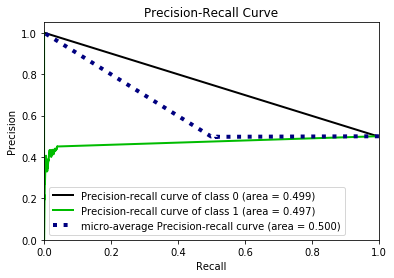

In [363]:
skplt.metrics.plot_precision_recall_curve(y1_test, lgr.predict_proba(X1_test.iloc[:,1:10]))

In [361]:
X1_test.iloc[:,1:10]

,type,amount,nameOrig,nameDest,newbalanceDest,oldbalanceDest,newbalanceOrig,oldbalanceOrg,Probability
230220,1,202564.35,281728276,1891465089,774702.20,884350.45,0.00,11742.00,0.197156
387665,1,134741.03,2087609613,1817805905,1498174.91,1220006.21,0.00,10634.00,0.091277
291459,1,95428.32,947728507,1720721903,95428.32,0.00,0.00,0.00,0.179243
1026293,1,147267.01,1556029086,1479614331,64210.56,107418.00,0.00,147267.01,0.898175
302855,2,1556.97,681075999,1621136683,0.00,0.00,147400.28,148957.25,0.026411
...,...,...,...,...,...,...,...,...,...
130500,2,5924.31,554415986,576688651,0.00,0.00,0.00,0.00,0.424545
1033612,1,3206623.39,1011158272,1883340818,6965506.67,3449811.90,0.00,3206623.39,1.000000
870140,4,1566057.28,646867271,701554593,0.00,0.00,0.00,1566057.28,1.000000
995663,1,4919642.57,693406382,1514738968,6333738.49,1414095.92,0.00,4919642.57,1.000000


I will break down data set into quartiles depending on the probability of being labeled as Fraudlent.
Doing this will allow me to identify transactions histories most likely to be labeled as fraudlent.

In [43]:
data['rankings'] = pd.qcut(data["Probability"],q=4,labels=[i for i in range(1,5)])

Fraudlent Transactions always have a new balance after transaction for transactions is typically 0. It likely that because these transactions are fraudlent, scammers quickly withdraw all of the balances into the new accounts.

Quartile 4 are transactions most likely to be labeled as Fraudlent

In [48]:
data.loc[data["rankings"]==4]

,step,type,amount,nameOrig,nameDest,newbalanceDest,oldbalanceDest,newbalanceOrig,oldbalanceOrg,Probability,predictions,isFraud,rankings
1030360,59,1,3857176.83,1585480308,78663667,4085718.45,228541.62,0.0,3857176.83,1.000000,1,1,4
1027282,48,1,5489302.04,123757418,346649476,6845692.85,1356390.81,0.0,5489302.04,1.000000,1,1,4
615175,34,1,989311.12,1177633466,1609979141,1998681.36,1009370.24,0.0,989311.12,1.000000,1,1,4
1030346,58,1,1789155.73,853148295,439525493,3820544.34,2031388.61,0.0,1789155.73,1.000000,1,1,4
1030365,59,4,1011606.26,813936493,1382261132,0.00,0.00,0.0,1011606.26,1.000000,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030763,91,4,737285.03,2082041963,484298628,0.00,0.00,0.0,737285.03,0.999999,1,1,4
1033612,93,1,3206623.39,1011158272,1883340818,6965506.67,3449811.90,0.0,3206623.39,1.000000,1,1,4
870140,42,4,1566057.28,646867271,701554593,0.00,0.00,0.0,1566057.28,1.000000,1,1,4
995663,45,1,4919642.57,693406382,1514738968,6333738.49,1414095.92,0.0,4919642.57,1.000000,1,1,4


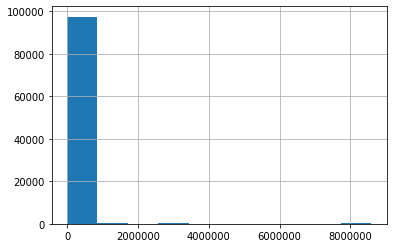

In [47]:
data.loc[data["rankings"]==4]["newbalanceOrig"].hist()

The transaction types for fraudlent transactions are typically cash out and transfer. Scammers are less likely to want to spend time in committing the transactions as a result transaction types of cash out ,cash in, debit, and payment will not occur

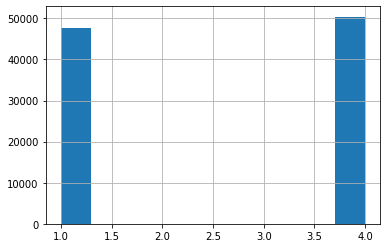

In [49]:
data.loc[data["rankings"]==4]["type"].hist()

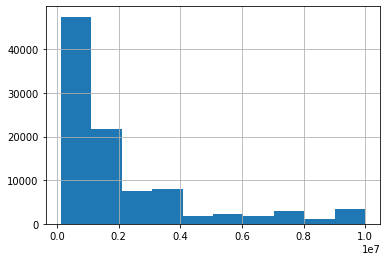

In [56]:
data.loc[data["rankings"]==4]["amount"].hist()

We will try Support Vector Machine Classification with a Linear kernel. We will set class_weight to balanced to adjust for an unbalanced labels.

In [31]:
from sklearn import svm

In [37]:
clf1 = svm.LinearSVC(class_weight='balanced')

SVM works best when the data is scaled

In [39]:
pipe1 = Pipeline([("scaler",scaler),("clf",clf1)])

In [40]:
pipe1.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight='balanced', dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [41]:
pipe1.score(X_test,y_test)

0.9943504333496094

In [44]:
from sklearn.cluster import KMeans

In [47]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,1231006815,170136.00,160296.36,1979787155,0.00,0.00,0,0
1,1,2,1864.28,1666544295,21249.00,19384.72,2044282225,0.00,0.00,0,0
2,1,4,181.00,1305486145,181.00,0.00,553264065,0.00,0.00,1,0
3,1,1,181.00,840083671,181.00,0.00,38997010,21182.00,0.00,1,0
4,1,2,11668.14,2048537720,41554.00,29885.86,1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,1,132557.35,1179511630,479803.00,347245.65,435674507,484329.37,616886.72,0,0
1048571,95,2,9917.36,1956161225,90545.00,80627.64,668364942,0.00,0.00,0,0
1048572,95,2,14140.05,2037964975,20545.00,6404.95,1355182933,0.00,0.00,0,0
1048573,95,2,10020.05,1633237354,90605.00,80584.95,1964992463,0.00,0.00,0,0


In [58]:
from sklearn.datasets.samples_generator import make_blobs

In [61]:
y = df["isFraud"]

In [59]:
X = df.iloc[:,1:9]

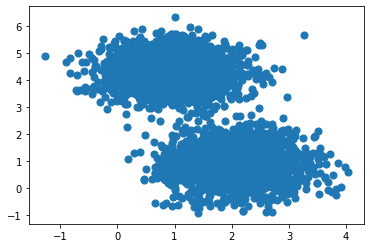

In [62]:
X, y = make_blobs(n_samples=4000, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

I would like to cluster the transaction records based on either being Fraudlent or non fraudlent.
I will have two cluster for the two label types

In [51]:
km = KMeans(n_clusters=2)

In [63]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
km_pred = km.predict(X)

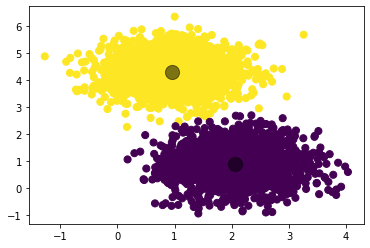

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=km_pred, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [69]:
km.labels_

array([1, 1, 0, ..., 0, 1, 0])